In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data, opsd_germany_daily

## 1. Convert date column to datetime format.

In [2]:
df = get_store_data()
df

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912996,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912997,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912998,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


In [3]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
df.sale_date.head()

0   2013-01-01 00:00:00+00:00
1   2013-01-02 00:00:00+00:00
2   2013-01-03 00:00:00+00:00
3   2013-01-04 00:00:00+00:00
4   2013-01-05 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]

## 2. Plot the distribution of sale_amount and item_price

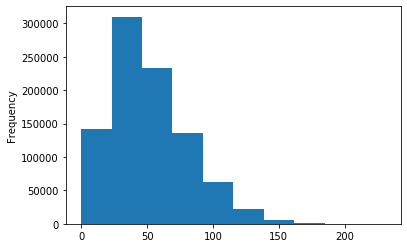

In [4]:
df.sale_amount.plot.hist()

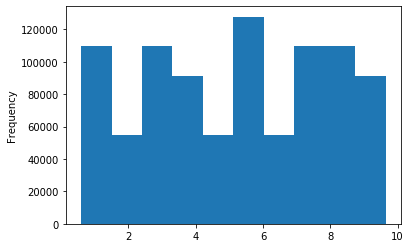

In [27]:
df.item_price.plot.hist()

## 3. Set the index to be the datetime variable.

In [6]:
df_saledate = df.set_index('sale_date')
df_saledate.head(), df_saledate.shape

(                           sale_amount  sale_id           store_address  \
 sale_date                                                                 
 2013-01-01 00:00:00+00:00         13.0        1  12125 Alamo Ranch Pkwy   
 2013-01-02 00:00:00+00:00         11.0        2  12125 Alamo Ranch Pkwy   
 2013-01-03 00:00:00+00:00         14.0        3  12125 Alamo Ranch Pkwy   
 2013-01-04 00:00:00+00:00         13.0        4  12125 Alamo Ranch Pkwy   
 2013-01-05 00:00:00+00:00         10.0        5  12125 Alamo Ranch Pkwy   
 
                             store_city  store_id store_state  store_zipcode  \
 sale_date                                                                     
 2013-01-01 00:00:00+00:00  San Antonio         1          TX          78253   
 2013-01-02 00:00:00+00:00  San Antonio         1          TX          78253   
 2013-01-03 00:00:00+00:00  San Antonio         1          TX          78253   
 2013-01-04 00:00:00+00:00  San Antonio         1          TX     

## 4. Add a 'month' and 'day of week' column to your dataframe.

In [7]:
df_saledate['month'] = df_saledate.index.month

In [8]:
df_saledate['day_of_week'] = df_saledate.index.day_name()

In [9]:
df_saledate.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-02 00:00:00+00:00,11.0,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Wednesday
2013-01-03 00:00:00+00:00,14.0,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Thursday
2013-01-04 00:00:00+00:00,13.0,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Friday
2013-01-05 00:00:00+00:00,10.0,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Saturday


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [10]:
df_saledate['sales_total'] = df_saledate.sale_amount * df_saledate.item_price

In [11]:
df_saledate.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Wednesday,9.24
2013-01-03 00:00:00+00:00,14.0,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Thursday,11.76
2013-01-04 00:00:00+00:00,13.0,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Friday,10.92
2013-01-05 00:00:00+00:00,10.0,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Saturday,8.40


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [28]:
def store_prep(df):
    
    """
    This functions takes in a df and returns 
    a prepared dataframe ready to explore
    """
    
    # Convert sale date to date time type
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    # Setting the index then sorting it
    df = df.set_index('sale_date').sort_index()
    
    # Creating month and day of week columns
    df_saledate['month'] = df_saledate.index.month
    df_saledate['day_of_week'] = df_saledate.index.day_name()
    
    # Adding sales total column
    df_saledate['sales_total'] = df_saledate.sale_amount * df_saledate.item_price 
    
    return df

In [29]:
# Plotting Histograms

def plot_hist(df, col, x_label=''):
    
        """
        This function takes in the df, specified column and x label
        and returns a histogram
        """
        #df name and column name
        plt.hist(df[col])
        #title for the histogram
        plt.title('Distribution of ' + col)
        #specified x label
        plt.xlabel(x_label)
        # y label
        plt.ylabel('Count')
        plt.show()

In [30]:
store_prep(df)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,21.0,619014,735 SW Military Dr,San Antonio,9,TX,78221,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,32.0,620840,8503 NW Military Hwy,San Antonio,10,TX,78231,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,55.0,622666,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066


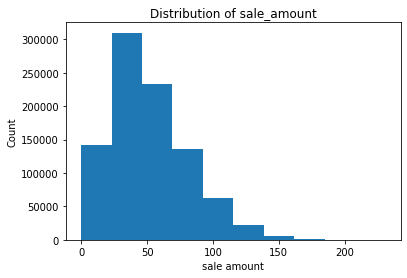

In [33]:
plot_hist(df, 'sale_amount', x_label='sale amount')

# Part II Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

## 1. Convert date column to datetime format.

In [12]:
df1 = opsd_germany_daily()
df1.head(), df1.shape

(         Date  Consumption  Wind  Solar  Wind+Solar
 0  2006-01-01     1069.184   NaN    NaN         NaN
 1  2006-01-02     1380.521   NaN    NaN         NaN
 2  2006-01-03     1442.533   NaN    NaN         NaN
 3  2006-01-04     1457.217   NaN    NaN         NaN
 4  2006-01-05     1477.131   NaN    NaN         NaN,
 (4383, 5))

In [13]:
df1.Date = pd.to_datetime(df1.Date)

## 2. Plot the distribution of each of your variables.

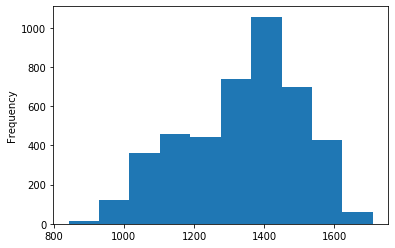

In [14]:
df1.Consumption.plot.hist()

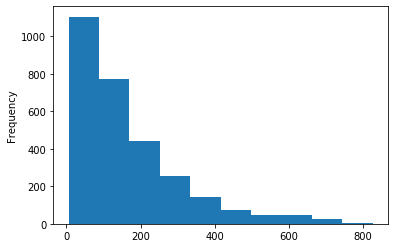

In [15]:
df1.Wind.plot.hist()

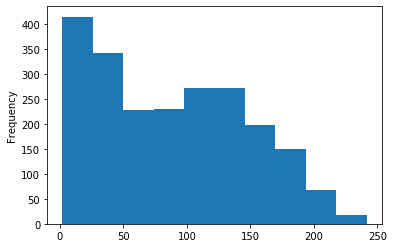

In [16]:
df1.Solar.plot.hist()

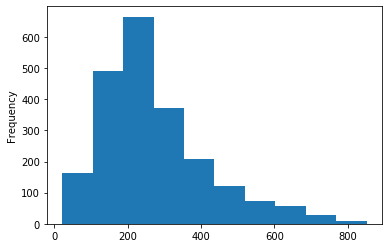

In [17]:
df1['Wind+Solar'].plot.hist()

## 3. Set the index to be the datetime variable.

In [18]:
df1.set_index('Date', inplace=True)

## 4. Add a month and a year column to your dataframe.

In [19]:
df1['month'] = df1.index.month

In [20]:
df1['year'] = df1.index.year

In [21]:
df1.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


## 5. Fill any missing values.

In [22]:
df1.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [23]:
#Filling it with zeros because either there was no data or
#it wasnt available

df1.fillna(0)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [36]:
df1 = opsd_germany_daily()

In [37]:
def prep_opsd_data(df):
    df.columns = [column.lower() for column in df]
    df = df.rename(columns={'wind+solar': 'wind_and_solar'})

    df.date = pd.to_datetime(df.date)
    df = df.set_index('date').sort_index()

    df['month'] = df.index.month
    df['year'] = df.index.year

    df = df.fillna(0)
    return df

In [38]:
prep_opsd_data(df1)

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017
